In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
tr_df = pd.read_csv('../input/random-linear-regression/test.csv')
tr_df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [3]:
tr_df.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


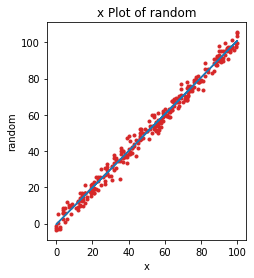

In [4]:
import matplotlib.pyplot as plt
X=tr_df.loc[:,['x']]
y=tr_df.loc[:,'y']
model =LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
y_pred = pd.Series(model.predict(X), index=X.index)
fig, ax = plt.subplots()
ax.plot(X['x'], y, '.', color='C3')
ax.plot(X['x'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('random')
ax.set_xlabel('x')
ax.set_title('x Plot of random');

In [5]:
print(model.coef_)


[1.01433536]


In [6]:
print(model.intercept_)

-0.4618107736611847


In [7]:
pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

,Coeff
x,1.014335


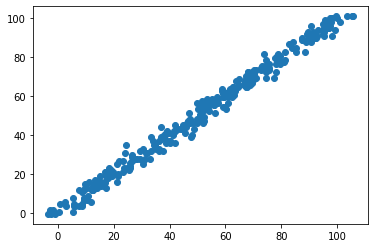

In [8]:
te_df=pd.read_csv('../input/random-linear-regression/test.csv')
test_X=te_df.loc[:,['x']]
test_y=te_df.loc[:,'y']
predictions=model.predict(test_X)
plt.scatter(test_y,predictions)

3.027257481717448

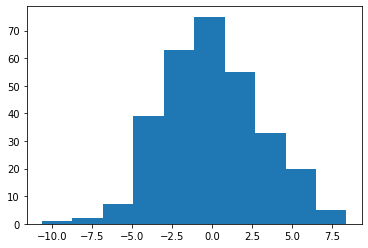

In [9]:
plt.hist(test_y-predictions)
from sklearn import metrics
metrics.mean_absolute_error(test_y,predictions)
metrics.mean_squared_error(test_y,predictions)
np.sqrt(metrics.mean_squared_error(test_y, predictions))